TKO_3120 Machine Learning and Pattern Recognition

Image recognition exercise


## Introduction

### Task and its purpose

The main task of this project is to use various supervised learning methods to classify three different kind of images from the dataset. We will use three different classifiers in the project, Ridge Classifier, Random Forest RF, and Multi-Layer Perceptron MLP. The order or steps in the project is as follows:

1. Data Understanding and Evaluation

The data understanding phase involves analyzing how the data is classified and what are the most important features in each classes. This phase we are also collecting the data, which is provided as a .txt file containing image URLs. Each URL is the link of a single image that we will use in the project. We have three different classes of images: grass, sand, and stairs. Each of these images may have different resolutions and dimensions.

2. Data Preparation

In data preparation step, we want to prepare the data for the modelling phase. We want to store each image as a three-dimensional array containing following values: height, width, and the color channel of the image. The pixel values are 8-bit unsigned integers from 0 to 255. After the storing, we want to crop each image into the same size to ensure that these values will be standardized, meaning that each image can be evaluated equally. We also want to convert all the images into two-dimensional grayscale array and reduce the quantization level to 8 by mapping pixel values into discrete levels from 0 to 7. Then we calculate for every image their Gray Level Co-occurence Matrix (GLCM), which captures textures by analyzing spatial relationships between pixel intensities in the grayscale image. In this exercise we want to calculate the correlation value for each image from their CLCM.

3. Modelling

In the modelling phase, we want to use three different classifiers that can identify these three classes from the given images. In this phase, we are going to use following classifiers to see which one performs best for this specific task: Ridge Classifier (RC), Random Forest (RF), and Multi-Layer Perceptron (MLP). We are going to use k-fold cross-validation to find all the best hyperparameters for each classifier.

4. Evaluation

Finally, we want to evaluate the overall performance of each classifier by using nested cross-validation method. During the exercise we can create some plots of these classifiers performance, and we finally we should be ready to use it in real world situations with unseen data.

### What our data is and where it is from?

We are using in total of 185 images where 62 are images of grass, 61 images are of sand, and 62 are of stairs. Our data is stored in .txt files which contains URLs of these pictures, which we will load from the internet while doing this exercise. As told earlier, these images have different features such as resolution and dimensions. All these images are gathered from [*unsplash.com*](https://unsplash.com/).

____

## Data preparation (and project initialization)

Now let's get to the data preparation phase. In this phase I will proceed in the following order:

1. Importing all the packages I need in this project.

2. Read all the URLs from the .txt data files and the import these images.

3. Modify the image sizes into same.

4. Change the images into grayscale and reduce the quantization level.

### Importing

In [62]:
# Data handling libraries
import numpy as np
import pandas as pd

# Machine learning libraries
import sklearn as sk
import skimage as ski

# Visualization libraries
import matplotlib.pyplot as plt
import imageio.v3 as imageio
import seaborn as sns

# Other libraries
import warnings

# In MLP part there rises a warning which may cause excessive amount of pages in PDF file.
# I ignore them here to make final result clearer.
warnings.simplefilter(action='ignore', category=sk.exceptions.ConvergenceWarning)

### Import Images

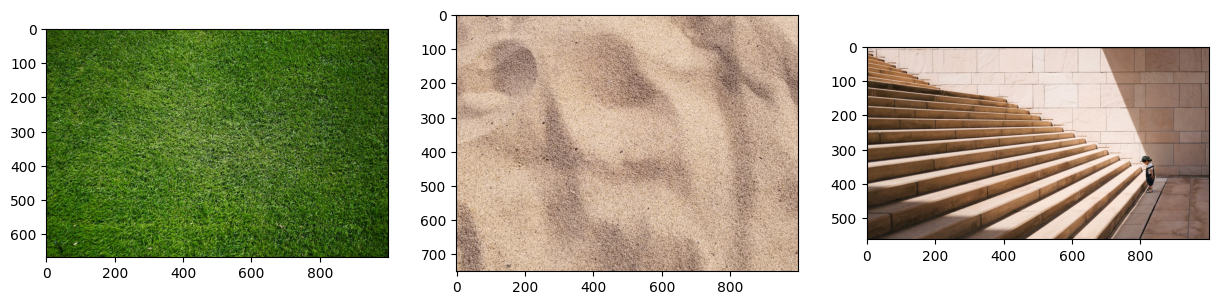

In [63]:
# Load all the .txt files
url_grass = np.loadtxt('data/grass.txt', dtype='U150')
url_sand = np.loadtxt('data/sand.txt', dtype='U150')
url_stairs = np.loadtxt('data/stairs.txt', dtype='U150')

# Load image urls for each class
grass = url_grass
sand = url_sand
stairs = url_stairs

# Load the images
img_grass = imageio.imread(grass[0])
img_sand = imageio.imread(sand[0])
img_stairs = imageio.imread(stairs[0])

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_grass, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(img_sand, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img_stairs, cmap='gray')
plt.show()

Now we have successfully loaded one image from each classes. We can see that all the images right now have somewhat little bit different resolutions. Otherwise, all three images are looking to be in their own classes so far so let's move on.

### Size Modifications

In [64]:
resized_grass = []
resized_sand = []
resized_stairs = []

# Modify the images for same size and resolution
for i in range(len(grass)):
    img = imageio.imread(grass[i])
    resized_img = ski.transform.resize(img, (256, 256))
    resized_grass.append(resized_img)

for i in range(len(sand)):
    img = imageio.imread(sand[i])
    resized_img = ski.transform.resize(img, (256, 256))
    resized_sand.append(resized_img)

for i in range(len(stairs)):
    img = imageio.imread(stairs[i])
    resized_img = ski.transform.resize(img, (256, 256))
    resized_stairs.append(resized_img)

Grass image shapes: (256, 256, 3)
Sand image shapes: (256, 256, 3)
Stairs image shapes: (256, 256, 3)


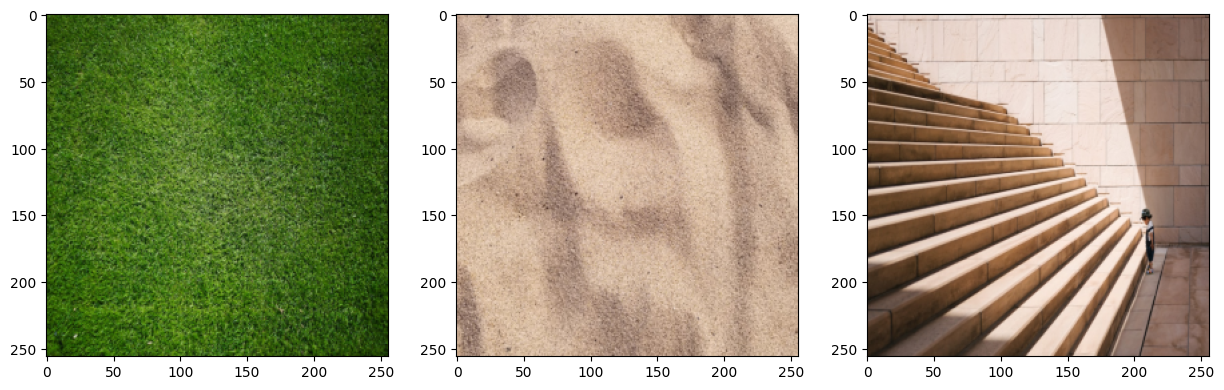

In [65]:
# Print the shapes of the images
print(f'Grass image shapes: {resized_grass[0].shape}')
print(f'Sand image shapes: {resized_sand[0].shape}')
print(f'Stairs image shapes: {resized_stairs[0].shape}')

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(resized_grass[0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(resized_sand[0], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(resized_stairs[0], cmap='gray')
plt.show()

Now the shapes of all images are (256, 256, 3), meaning that we have equal resolution for all the images. The number 3 means the color channel number, which should be 3, because these are still RGB images. Now let's move on to change images into grayscale and reduce the quantization level.

### Grayscaling and Quantization Level Reduction.

Grass image shapes: (256, 256)
Sand image shapes: (256, 256)
Stairs image shapes: (256, 256)


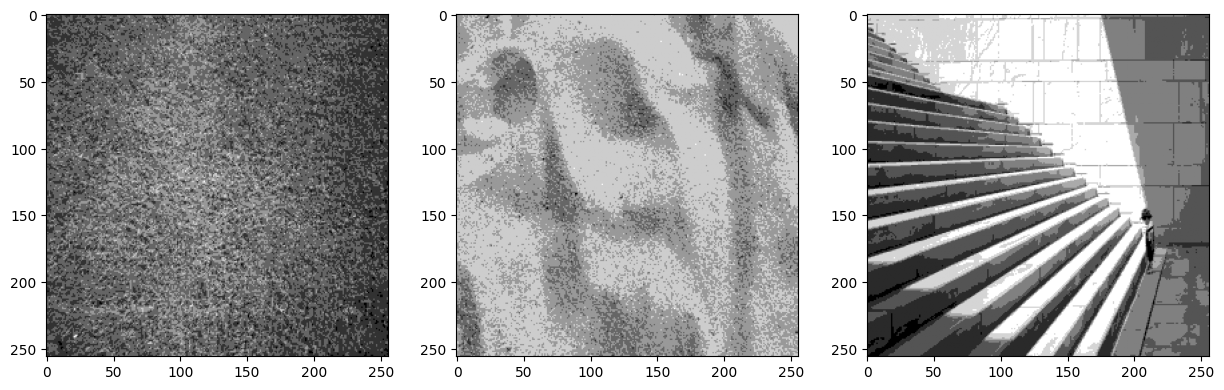

In [66]:
# Create a lists to store the grayscaled and quantized images
prepared_grass = []
prepared_sand = []
prepared_stairs = []

# Fucntion to reduce the quantization levels
def reduce_quantization(img, levels): # 'levels' is the number of quantization levels

    # Quantize the image
    quantized_img = np.floor(img * (levels - 1))

    # Scale the image back to 0-255
    quantized_img = (quantized_img * (255 / (levels - 1))).astype(np.uint8)

    return quantized_img

# Do the conversion now for all the images

for i in range(len(resized_grass)):
    # Convert the image to grayscale
    gray_img = ski.color.rgb2gray(resized_grass[i])

    # Reduce the quantization levels
    quantized_img = reduce_quantization(gray_img, 8)

    # Append the image to the list
    prepared_grass.append(quantized_img)

# Now do the same for the sand and stairs images
for i in range(len(resized_sand)):
    gray_img = ski.color.rgb2gray(resized_sand[i])
    quantized_img = reduce_quantization(gray_img, 8)
    prepared_sand.append(quantized_img)

for i in range(len(resized_stairs)):
    gray_img = ski.color.rgb2gray(resized_stairs[i])
    quantized_img = reduce_quantization(gray_img, 8)
    prepared_stairs.append(quantized_img)


# Print the shapes of the images
print(f'Grass image shapes: {prepared_grass[0].shape}')
print(f'Sand image shapes: {prepared_sand[0].shape}')
print(f'Stairs image shapes: {prepared_stairs[0].shape}')

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(prepared_grass[0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(prepared_sand[0], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(prepared_stairs[0], cmap='gray')
plt.show()

Now we have changed the images into grayscale level and all the images have two-dimensional shape. (256, 256). We also have now reduced the quantization level to 8.

Now our data is prepared and it is ready for feature extraction phase. Let's move forward.

___

## Feature extraction

Now we want to calculate the mean and variance values for each color channels for all the images. This should give us in total of 6 different features (2 feature, for each color channel, mean and variance).

Now let's calculate the mean and the variance.

### Mean and Variance for RGB Color Channels

In [67]:
# Let's create a function that computes the color features from the images
def compute_color_features(img):
    # Compute the mean and variance of each channel
    mean_r = np.mean(img[:, :, 0]) # [width, height, channel]
    mean_g = np.mean(img[:, :, 1]) # So color features are in the last dimension
    mean_b = np.mean(img[:, :, 2])

    var_r = np.var(img[:, :, 0])
    var_g = np.var(img[:, :, 1])
    var_b = np.var(img[:, :, 2])

    # Return the computed features
    return mean_r, mean_g, mean_b, var_r, var_g, var_b

# Now apply the compute_color_features function to all the images
color_features_grass = [compute_color_features(img) for img in resized_grass] # Here we want to use the resized images, not the quantized ones
color_features_sand = [compute_color_features(img) for img in resized_sand]
color_features_stairs = [compute_color_features(img) for img in resized_stairs]

# Now let's convert the lists to one single dataframe
# First, we create a list that will contain all the features
all_image_features = []

# Loop through all the images and append the features to the list
for i in range(len(resized_grass)):
    features = list(color_features_grass[i])
    
    # Class label
    features.append('grass')

    # Append image features to the all_images_features list
    all_image_features.append(features)

for i in range(len(resized_sand)):
    features = list(color_features_sand[i])
    features.append('sand')
    all_image_features.append(features)

for i in range(len(resized_stairs)):
    features = list(color_features_stairs[i])
    features.append('stairs')
    all_image_features.append(features)

# Convert the all_image_features list to a dataframe
df_color_features = pd.DataFrame(all_image_features, columns=['mean_r', 'mean_g', 'mean_b', 'var_r', 'var_g', 'var_b', 'class'])

# Print the first 5 rows of the dataframe to check if everything is correct
df_color_features.head()

,mean_r,mean_g,mean_b,var_r,var_g,var_b,class
0,0.256103,0.403247,0.105743,0.007795,0.009279,0.004380,grass
1,0.473855,0.551079,0.488054,0.062190,0.049244,0.082608,grass
2,0.107923,0.352118,0.065584,0.004743,0.035984,0.003607,grass
3,0.398569,0.463700,0.088949,0.013375,0.015434,0.006623,grass
4,0.426342,0.597375,0.153288,0.031844,0.022578,0.021233,grass


Now we have computed the first order texture measures, and we got a nice dataframe of all the images and their mean or variances of colors. I also added the class label there if it could be useful in the future.

### Gray-Level-Co-Occurrence (GLCM) Features

Now the following task is to compute the GLCM features for each image.

Here we want to do following steps:

1. Calculate the GLC matrix

2. Calculate the correlation with two different distances and two different directions by using GLC Matrix.

In [68]:
# Let's begin by creating a function that compute the glcm features from the images with different angles and distances.
def compute_glcm_features(img):
    angles = [0, np.pi/2] # Angles of horizontal and vertical directions
    distances = [1, 2] # Distances of 1 and 2 pixels
    levels = 256 # Here we define the value of the quantization levels

    # Compute the glcm matrix
    glcm = ski.feature.graycomatrix(img, distances, angles, levels, symmetric=True, normed=True)

    # Compute the correlation features from the glcm matrix
    correlation_0 = ski.feature.graycoprops(glcm, 'correlation')[:, 0] # All distances for 0 degrees
    correlation_90 = ski.feature.graycoprops(glcm, 'correlation')[:, 1] # and all distances for 90 degrees

    # Finally, return the computed features
    return correlation_0.tolist() + correlation_90.tolist()


# Now we apply the compute_glcm_features function to all the images
# We want to use our quantized (or prepared) images for this.
glcm_features_grass = [compute_glcm_features(img) for img in prepared_grass]
glcm_features_sand = [compute_glcm_features(img) for img in prepared_sand]
glcm_features_stairs = [compute_glcm_features(img) for img in prepared_stairs]

# Now we want to convert these features again to the single dataframe.
# Let's do that pretty much like we did in the first order texture measures.
all_image_features = []

for features in glcm_features_grass:
    features = list(features)
    features.append('grass')
    all_image_features.append(features)

for features in glcm_features_sand:
    features = list(features)
    features.append('sand')
    all_image_features.append(features)

for features in glcm_features_stairs:
    features = list(features)
    features.append('stairs')
    all_image_features.append(features)

# Now convert the list to a dataframe
df_glcm_features = pd.DataFrame(all_image_features, columns=['correlation_0_d1', 'correlation_0_d2', 'correlation_90_d1', 'correlation_90_d2', 'class'])

#Print the first 5 rows of the dataframe to check if everything is correct
df_glcm_features

,correlation_0_d1,correlation_0_d2,correlation_90_d1,correlation_90_d2,class
0,0.519086,0.359720,0.494910,0.327924,grass
1,0.967592,0.949683,0.958562,0.931038,grass
2,0.725170,0.434889,0.746933,0.478108,grass
3,0.697852,0.507817,0.785294,0.614473,grass
4,0.893668,0.807989,0.954867,0.911336,grass
...,...,...,...,...,...
180,0.941575,0.819487,0.893112,0.695009,stairs
181,0.825988,0.701265,0.868519,0.756679,stairs
182,0.966105,0.928328,0.979611,0.954836,stairs
183,0.976277,0.955255,0.978486,0.960712,stairs


Now we have correlation values for the all the images. Here I also added the label of the image to the dataframe, if we need to use them later for plotting or something else.

From the dataframe we can already see that the GLCM features actually differ between the classes. For instance, the contrast on grass images are higher than on sand images.
This is a good sign that the features may be useful for classification.

I choose to use two different distances here of 1 and 2, and the finally use two different angles (horizontal and vertical directions). The distance of 1 is value which able to capture the texture differences by analyzing relationships straight between the adjacent pixels. The distance of 2 is then able to capture little broader are of textures with 2-pixel distances. These angles I used, on the other hand, ensures that all the texture featuers are computed in multiple directions.

## Feature relationships

Now we are going to do some illustration of our results. First we are going to create a pairplot of the feature pairs, then histograms of Z-scored features and finally Priciple Component Analysis and the scatterplot for it. We want to see from the scatterplot if any of these values are clustering together.

### Pairplot

Now we want to create a pairplot of correlation values, which should show the number of correlation values for each category. Then we should also see if any of these values have a pattern in common.

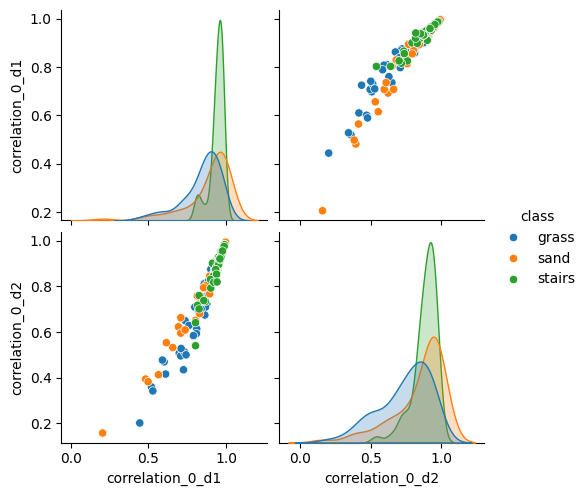

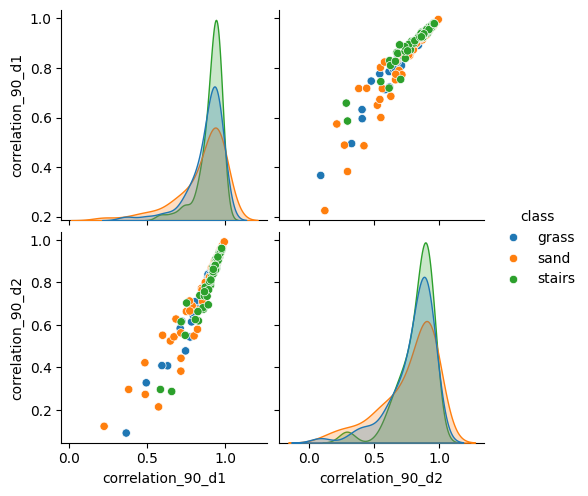

In [69]:
# Create the pairplots
sns.pairplot(df_glcm_features, hue='class', vars=['correlation_0_d1', 'correlation_0_d2'])
sns.pairplot(df_glcm_features, hue='class', vars=['correlation_90_d1', 'correlation_90_d2'])

From this plot we can see that both correlation_0_d1 x correlation_0_d2 and correlation 90_d1 x correlation_90_d2 show a strong positive linear trend, which indicates that these pairs are linearly dependent.

For stairs (green dots) we can see that stairs are actually not speared as much as grass (blue dots) and sand (orange dots) values are, meaning that the correlation values on grass and sand vary much more. Grass and sand also share much more similar linear patterns together.

### Histograms
Now we want to plot the histograms for each features. With these histograms we should see some possible distributions of their values between different colors and textures.

In [70]:
# At first we want to combine color and glcm correlation features to a single dataframe
df_all_features = pd.concat([df_color_features.drop(columns=['class']), df_glcm_features], axis=1)

# Now we do the Z-score normalization for the features
z_scored_features = sk.preprocessing.scale(df_all_features.drop(columns=['class']))
z_scored_features = pd.DataFrame(z_scored_features, columns=df_all_features.columns[:-1])
z_scored_features['class'] = df_all_features['class']

# Let's check that the normalization worked
z_scored_features.describe()

,mean_r,mean_g,mean_b,var_r,var_g,var_b,correlation_0_d1,correlation_0_d2,correlation_90_d1,correlation_90_d2
count,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02
mean,-1.056212e-16,-1.440289e-17,-9.601929e-17,1.728347e-16,5.761157e-17,9.601929e-18,-2.880579e-16,3.840772e-16,8.161640e-16,3.648733e-16
std,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00
min,-2.406225e+00,-2.260546e+00,-1.888267e+00,-1.350247e+00,-1.381159e+00,-9.915366e-01,-5.559933e+00,-3.957249e+00,-5.227024e+00,-3.967436e+00
25%,-7.746676e-01,-7.617671e-01,-7.309385e-01,-7.946575e-01,-7.591131e-01,-7.259534e-01,-2.593606e-01,-4.608699e-01,-1.803345e-01,-3.484684e-01
50%,1.365617e-02,-1.005455e-01,-1.125036e-01,-1.376943e-01,-1.736580e-01,-3.962758e-01,3.888536e-01,3.457081e-01,3.957752e-01,4.273955e-01
75%,7.039313e-01,7.226275e-01,7.682437e-01,5.964399e-01,5.626095e-01,4.452155e-01,6.407193e-01,7.164628e-01,6.035614e-01,6.683150e-01
max,2.551755e+00,2.633190e+00,2.598097e+00,3.974961e+00,4.998131e+00,4.111626e+00,8.849147e-01,1.045001e+00,9.412166e-01,1.119628e+00


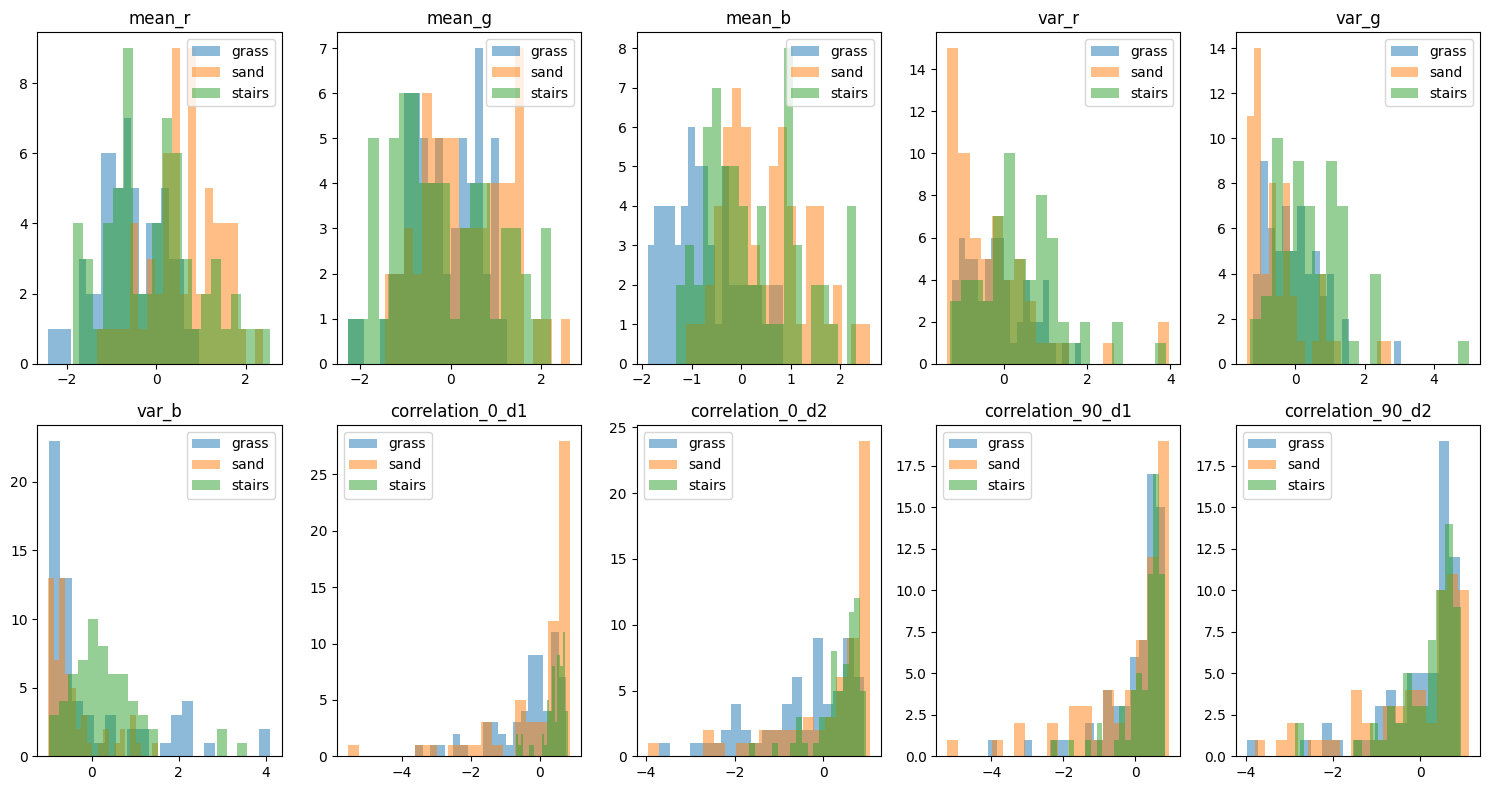

In [71]:
# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

for i, feature in enumerate(z_scored_features.columns[:-1]):  # Exclude 'class' column from plotting
    ax = axes[i // 5, i % 5]  # Adjust grid size
    for class_name in z_scored_features['class'].unique():
        subset = z_scored_features[z_scored_features['class'] == class_name]
        ax.hist(subset[feature], alpha=0.5, label=class_name, bins=20)
    
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()
plt.show()

From these histograms, we can see that each image has its own region with the highest values in a given range. For example, in picture mean_b, we can clearly see that the grass has the lowest value of blue, which is reasonable, because grass is typically just green. In the same mean_b image, we can see that sand and stairs have more blue, which tells us that the color characteristics are very distinct, allowing us to classify the task based on color.

We also see that none of these values are normally distributed. The var_r and var_g values are skewed to the right, indicating that most of these images have low variance in these channels, with a few outlier values showing high variance.

We can see that the best features for making classifiers are clearly from the correlation_0_d2 GLCM matrix, and from the color feature extraction mean_b and var_b gives us the best classifiers.

### PCA
Now the last illustration task is to create a PCA and scatterplot for the different color features. If we can see some clustering of these color for classes, we may use them for the classifying task.

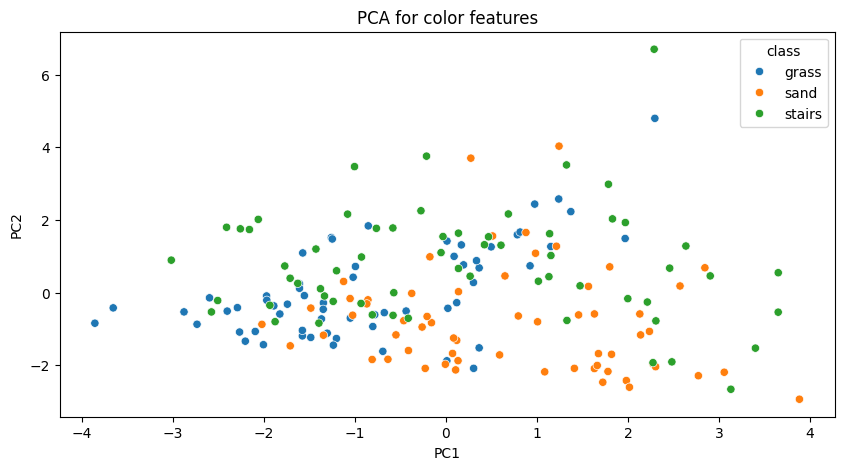

In [72]:
# Define the PCA object
pca = sk.decomposition.PCA(n_components=2)

# Do the Z-scoring for the color features
z_scored_color_features = sk.preprocessing.scale(df_color_features.drop(columns=['class']))

# PCA for the color features
color_pca = pca.fit_transform(z_scored_color_features)

# Create a dataframe for the PCA results
df_color_pca = pd.DataFrame(color_pca, columns=['PC1', 'PC2'])

# Do the plotting for the color features
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_color_pca, x='PC1', y='PC2', hue=df_color_features['class'])
plt.title('PCA for color features')
plt.show()

We can see that there is a significant overlap between these image classes, which tells that color alone might not be sufficient to make reliable classifications. For example the stairs class shows a really large spread out, which means that it might be distinguishable in some cases, and sand and grass classes are mixed, which could lead to classification difficulties. 

Since we have data points that are not completetly separable, we might need to use some non-linear model like Random Forest classifier to make mroe meaningful predictions.

## Build classifiers and select the best hyperparameters with cross validation

### Separate the features and target variables + CV initialize

- X = Features we are using (we want to standardize this, because we are using all the features here)
- Y = Target variable we are trying to predict with the classifier

Then we also define a cross-validation that can be used later for all the different classifiers.

In [73]:
# Separate the featutures and the target variable
X = df_all_features.drop(columns=['class'])
Y = df_all_features['class']

# Now do the standardization for X (Z-score normalization)
scaler = sk.preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# Create StratifiedKFold which will be used for all the classifiers
cv = sk.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # I use the random_state for reproductibility here

### Ridge Classifier

Now we are going to do the ridge classifier for the model, where we are going to use [0.001, 0.01, 0.1, 1] as regularization term strength.

In [74]:
# Define the classifier hyperparameters here
rc_parameters = {
    'alpha': [0.001, 0.01, 0.1, 1]
    }

# Create the Ridge classifier
ridge_classifier = sk.linear_model.RidgeClassifier()

# Perform the grid search with GridSearchCV
grid_search = sk.model_selection.GridSearchCV(ridge_classifier, rc_parameters, cv=cv, scoring='accuracy')
grid_search.fit(X, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RidgeClassifier(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]}, scoring='accuracy')

In [75]:
# Now print the best hyperparameters from the grid search
print(f'Best hyperparameters for model: {grid_search.best_params_}')

# Accuracy with the best hyperparameters
print(f'Accuracy with the best hyperparameters: {grid_search.best_score_}')

Best hyperparameters for model: {'alpha': 1}
Accuracy with the best hyperparameters: 0.827027027027027


Now we got the best hyperparameter values for the Ridge classifier, which shows that the highest alpha value gives us the best accuracy, about 0.827. This accuracy is tolarable, but we still cannot say that it is robust. Now let's see other classifiers.

### Random Forest

After ridge classifier, we are testing the Random Forest classifier to see how it performs. In this classifier we want to set following parameters:

- n_estimators: 100 - 300 with 50 steps
    - With this parameter we decide how many decision trees there is in our Random Forest.

- max_features: ['sqrt', 'log2', None]
    - With this parameter we determine how many features each tree considers while making a split.

- Bootstrap or not
    - Bootstrapping determines how we use the sampling data for each tree. If we have value true, each tree will be trained on random subset of data and with value of False, we are training each train on entire dataset, which may cause overfitting obviously. But let's see how the cross-validation is effecting for this hyperparameter.

In [76]:
# Now we want to create a Random Forest classifier

# Define the hyperparameters grid for the Random Forest
rf_parameters = {
    'n_estimators': np.arange(100, 301, 50), # From 100 to 300 with 50 steps
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the Random Forest classifier with parameter grid
rf_classifier = sk.ensemble.RandomForestClassifier(random_state=42)

# Perform the grid search with GridSearchCV again now for the Random Forest
grid_search = sk.model_selection.GridSearchCV(rf_classifier, rf_parameters, cv=cv, scoring='accuracy')
grid_search.fit(X, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([100, 150, 200, 250, 300])},
             scoring='accuracy')

In [77]:
# Now we print the results from the grid search
# Best hyperparameters
print(f'Best hyperparameters for model: {grid_search.best_params_}')

# Accuracy with these hyperparameters
print(f'Accuracy with the best hyperparameters: {grid_search.best_score_}')

Best hyperparameters for model: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': np.int64(250)}
Accuracy with the best hyperparameters: 0.772972972972973


The best hyperparameters for the model are following:

- n_estimators: 250
- max_features: sqrt
- bootstrap: True, meaning we are using bootstrap

With these hyperparameters we got accuracy for model of about 0.773. So far worse than ridge classifier.

Let's move on to next classifier.

#### Feature Importance
One task also was to take a look of feature importance in this classifier. At first let's see from grid_search that which features were most important.

In [78]:
# Feature importances for the Random Forest
# Fit the Random Forest with the best hyperparameters
rf_classifier = sk.ensemble.RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf_classifier.fit(X, Y)

# Get the feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dataframe for the feature importances
df_feature_importances = pd.DataFrame(feature_importances, index=df_all_features.columns[:-1], columns=['importance'])
df_feature_importances = df_feature_importances.sort_values(by='importance', ascending=False)

df_feature_importances

,importance
mean_b,0.163534
var_b,0.150734
mean_r,0.117988
var_g,0.109622
correlation_0_d2,0.106476
correlation_0_d1,0.104734
mean_g,0.079374
var_r,0.057454
correlation_90_d2,0.056054
correlation_90_d1,0.054031


From this dataframe we can clearly see that the two most important features were mean_b and var_b. When we looked at the plots of these features, these features showed some potential to be really important features in the classification task. This also confirms that there was some idea on our finding earlier!

### Multi Layer Perceptor (MLP)

Now we are testing the Multi Layer Perceptor classifier with following hyperparameters:

- hidden_layer_sizes: 
    - One hidden layer with neurons from 15 to 40 in steps of 5

- activation: Tanh or Relu
    - Activation function for classifier, either Tanh or Rectified Linear Units (ReLU).
    - Tanh is non-linear function that maps our inputs to a range between -1 and 1 and able us to capture patterns without gradient issues. [2]
    - ReLU is a activation function that output 0 for negative inputs and keeps positive values unchanged, possibly us faster training time. May cause dying ReLU, where some neurons stop learning. [3]

- solver: sgd or adam
    - Optimization algoritmhs Stochastic Gradient Descent (SGD) or Adaptive Moment Estimation (Adam) 
    - SGD is an optimization algorith that updates model weights by using only a single data point per iteration. Speed up trainign, but may cause some noise. [4]
    - Adam is an optimization algorithm which adjust the step size for each parameter based on past gradient. Typically fasten the training, but is not sensitive for noise as SGD. [5]

- alpha: [0.01, 0.1, 1]
    - Define the strength of regularization

- Validation Fraction: [0.1, 0.3]
    - Defines the fraction of data in validation process

- Max Iter: [1000]
    - Define the maximum amount of iterations for convergence.

In [79]:
# Let's first define the hyperparameter grid for the MLP classifier
mlp_parameters = {
    'hidden_layer_sizes': [(n,) for n in range(15, 41, 5)], # From 15 to 40 with 5 steps
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.1, 1],
    'validation_fraction': [0.1, 0.3],
    'max_iter': [200]
}

# Create the MLP classifier
mlp_classifier = sk.neural_network.MLPClassifier(random_state=42)

# Grid search
grid_search = sk.model_selection.GridSearchCV(mlp_classifier, mlp_parameters, cv=cv, scoring='accuracy')
grid_search.fit(X, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.01, 0.1, 1],
                         'hidden_layer_sizes': [(15,), (20,), (25,), (30,),
                                                (35,), (40,)],
                         'max_iter': [200], 'solver': ['sgd', 'adam'],
                         'validation_fraction': [0.1, 0.3]},
             scoring='accuracy')

In [80]:
# Print the results from the grid search
# Best hyperparameters
print(f'Best hyperparameters for model: {grid_search.best_params_}')

# Accuracy with the best hyperparameters
print(f'Accuracy with the best hyperparameters: {grid_search.best_score_}')

Best hyperparameters for model: {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (40,), 'max_iter': 200, 'solver': 'adam', 'validation_fraction': 0.1}
Accuracy with the best hyperparameters: 0.7837837837837839


Now we have run the last classifier with Stratified K-Fold Cross-Validation. We got best accuracy for MLP with following hyperparameters:

- activation: Relu
- alpha: 1
- hidden_layer_sizes: 40
- solver: Adam
- validation_fraction: 0.1

The accuracy with these hyperparameters were about 0.784, which is better than Random Forest, but worse than Ridge Classifier.

## Estimate the performance of the models with nested cross-validation

Ridge classifier accuracy: 0.8162162162162163
Ridge classifier best hyperparameters: {'alpha': 1}


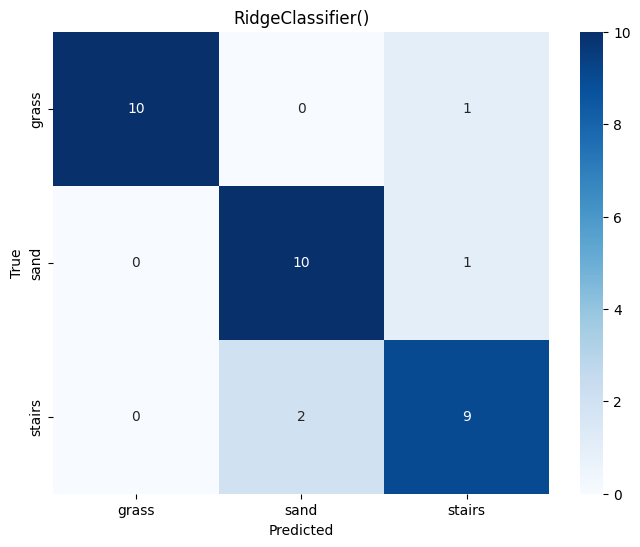

In [81]:
# With this task we want to start with initializing outer and inner cross-validation loops

# Inner loop
inner_cv = sk.model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Outer loop
outer_cv = sk.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# We create a dictionary where to store the results
results = {}

# Now we want to implement the nested cross-validation function
def nested_cv(classifier, parameters, X, Y, inner_cv, outer_cv):
    outer_scores = []
    confusion_matrices = []

    # Now we loop through the outer cross-validation splits
    for train_idx, test_idx in outer_cv.split(X, Y):
        # Split the data to training and testing sets
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]

        # Here we perform the inner cross-validation to find the best hyperparameters
        grid_search = sk.model_selection.GridSearchCV(classifier, parameters, cv=inner_cv, scoring='accuracy')
        grid_search.fit(X_train, Y_train)

        # Now we traing the final model with the best hyperparameters
        best_estimator = grid_search.best_estimator_
        Y_pred = best_estimator.predict(X_test)

        # Now we compute the accuracy and confusion matrix
        accuracy = sk.metrics.accuracy_score(Y_test, Y_pred)
        outer_scores.append(accuracy)
        confusion_matrix = sk.metrics.confusion_matrix(Y_test, Y_pred)
        confusion_matrices.append(confusion_matrix)


    # Compute the mean confusion matrix
    confusion_matrices = np.mean(confusion_matrices, axis=0).astype(int)

    # Here we want to plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrices, annot=True, fmt='d', cmap='Blues', xticklabels=['grass', 'sand', 'stairs'], yticklabels=['grass', 'sand', 'stairs'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{classifier}')
    plt.show

    # Store the results to the dictionary
    return np.mean(outer_scores), confusion_matrices, grid_search.best_params_

# Now we want to run the nested cross-validation for the Ridge classifier
results['ridge'] = nested_cv(ridge_classifier, rc_parameters, X, Y, inner_cv, outer_cv)

# Print the results
print(f'Ridge classifier accuracy: {results["ridge"][0]}')
print(f'Ridge classifier best hyperparameters: {results["ridge"][2]}')


Random Forest classifier accuracy: 0.745945945945946
Random Forest classifier best hyperparameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': np.int64(150)}


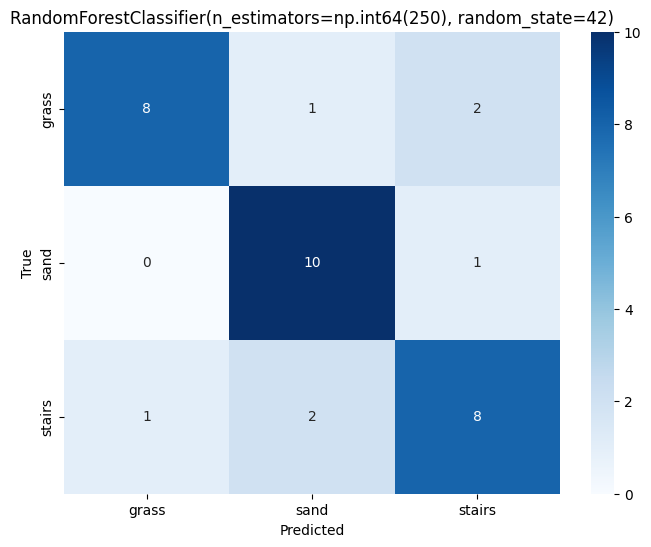

In [82]:
# Now we want to run the nested cross-validation for the Random Forest classifier
results['random_forest'] = nested_cv(rf_classifier, rf_parameters, X, Y, inner_cv, outer_cv)

# Print the results
print(f'Random Forest classifier accuracy: {results["random_forest"][0]}')
print(f'Random Forest classifier best hyperparameters: {results["random_forest"][2]}')

MLP classifier accuracy: 0.7513513513513514
MLP classifier best hyperparameters: {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (25,), 'max_iter': 200, 'solver': 'adam', 'validation_fraction': 0.1}


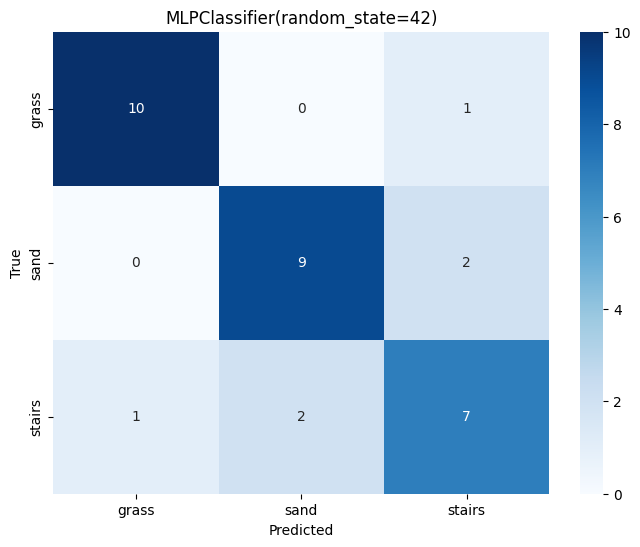

In [83]:
# And finally we want to run the nested cross-validation for the MLP classifier
results['mlp'] = nested_cv(mlp_classifier, mlp_parameters, X, Y, inner_cv, outer_cv)

# Print the results
print(f'MLP classifier accuracy: {results["mlp"][0]}')
print(f'MLP classifier best hyperparameters: {results["mlp"][2]}')

Now we have calculated the outer rounds accuracies which are following for each classifiers:

- Ridge Classifier: ≈0.816
- Random Forest: ≈0.746
- MLP: ≈0.751

The outer-round accuracies are these accuracies, which we have computed by using nested cross-validation for each classifier and which describe how well the model generalizes to unseen data. With this calculation, we use a real test set that gives the most reliable accuracy of real-world performance and avoids overly optimistic results that may arise from single train-test-splits.

### In conclusion

Now we have done all the tasks and it is time to discuss little bit about the results.

#### Model performance
Well, the best model in the project here was Ridge Classifier, providing an accuracy of approximately 81.6%. For me this results is actually somewhat suprising, while we are actually having pretty small amount of data. Random Forest or MLP otherwise did not perform that well. Their accuracies were in Random Forest of 74.6% and in MLP of 75.1%. Even the Ridge Classifiers accuracy could get much higher with more data which is see one possible weaknesses right now in our project. Random Forest and MLP could get even better results with higher datasets because they are much more sensitive for overfitting than the Ridge Classification, which is linear model.

#### Limitations

As I have mentioned already, the main limitation in our results is indeed data size. A small dataset may lead to underfitting, meaning the model might not have enough information to learn patterns effectively. This is the reason why our Ridge Classifier is working better right now than Random Forest or MLP.

#### How these results may be improved?

1. We want to gain the amount of data, which would help all the models generalize better, especially non-linear models.

2. We have already created good implementations to find best hyperparameters, but it is necessary to run these while the data size gains, because other models may start to benefit much more with larger data.

3. Trying other available models, like Support Vector Machines (SVMs).

#### Finally

For me the project feels successful. As myself I feel I learnt a lot of image recognition in this exercise and how different factors like colors and texture differences effect for the results. With more data and futher tuning we could get even better performance across all the models.



## References:

[1] https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_glcm.html

[2] https://paperswithcode.com/method/tanh-activation

[3] https://paperswithcode.com/method/relu

[4] https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

[5] https://www.geeksforgeeks.org/adam-optimizer/